## Loading Libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load & Explore Dataset

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

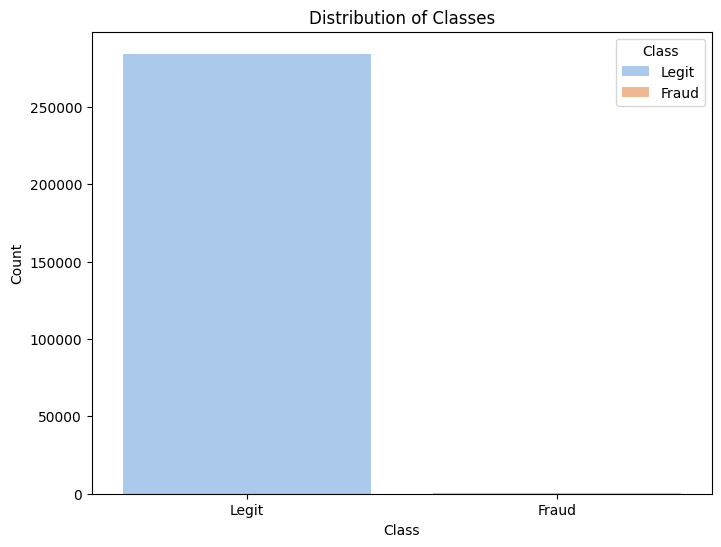

In [12]:
# Load the dataset 
file_path = "C:\\Users\\PC\\OneDrive\\Documents\\Internship\\Credit Card Fraud Detection\\creditcard.csv"
sales_data = pd.read_csv(file_path)

# Explore the dataset
## Display the first few rows
print(sales_data.head())
## Show dataset information
print(sales_data.info())
## Check for missing values
print(sales_data.isnull().sum())

# Count plot to visualize the distribution of classes (Fraud vs. Legit)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=sales_data, palette='pastel', hue='Class', dodge=False)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Legit', 'Fraud'])
plt.legend(title='Class', loc='upper right', labels=['Legit', 'Fraud'])
plt.show()

## Preprocessing the Data

In [3]:
# Separate features (X) and labels (y)
X = sales_data.drop('Class', axis=1)  # Assuming 'Class' is the target variable where 1 = Fraud, 0 = Legit
y = sales_data['Class']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Addressing class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Feature Selection

In [4]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

## Visualizing Feature Relationships

<Figure size 1000x1000 with 0 Axes>

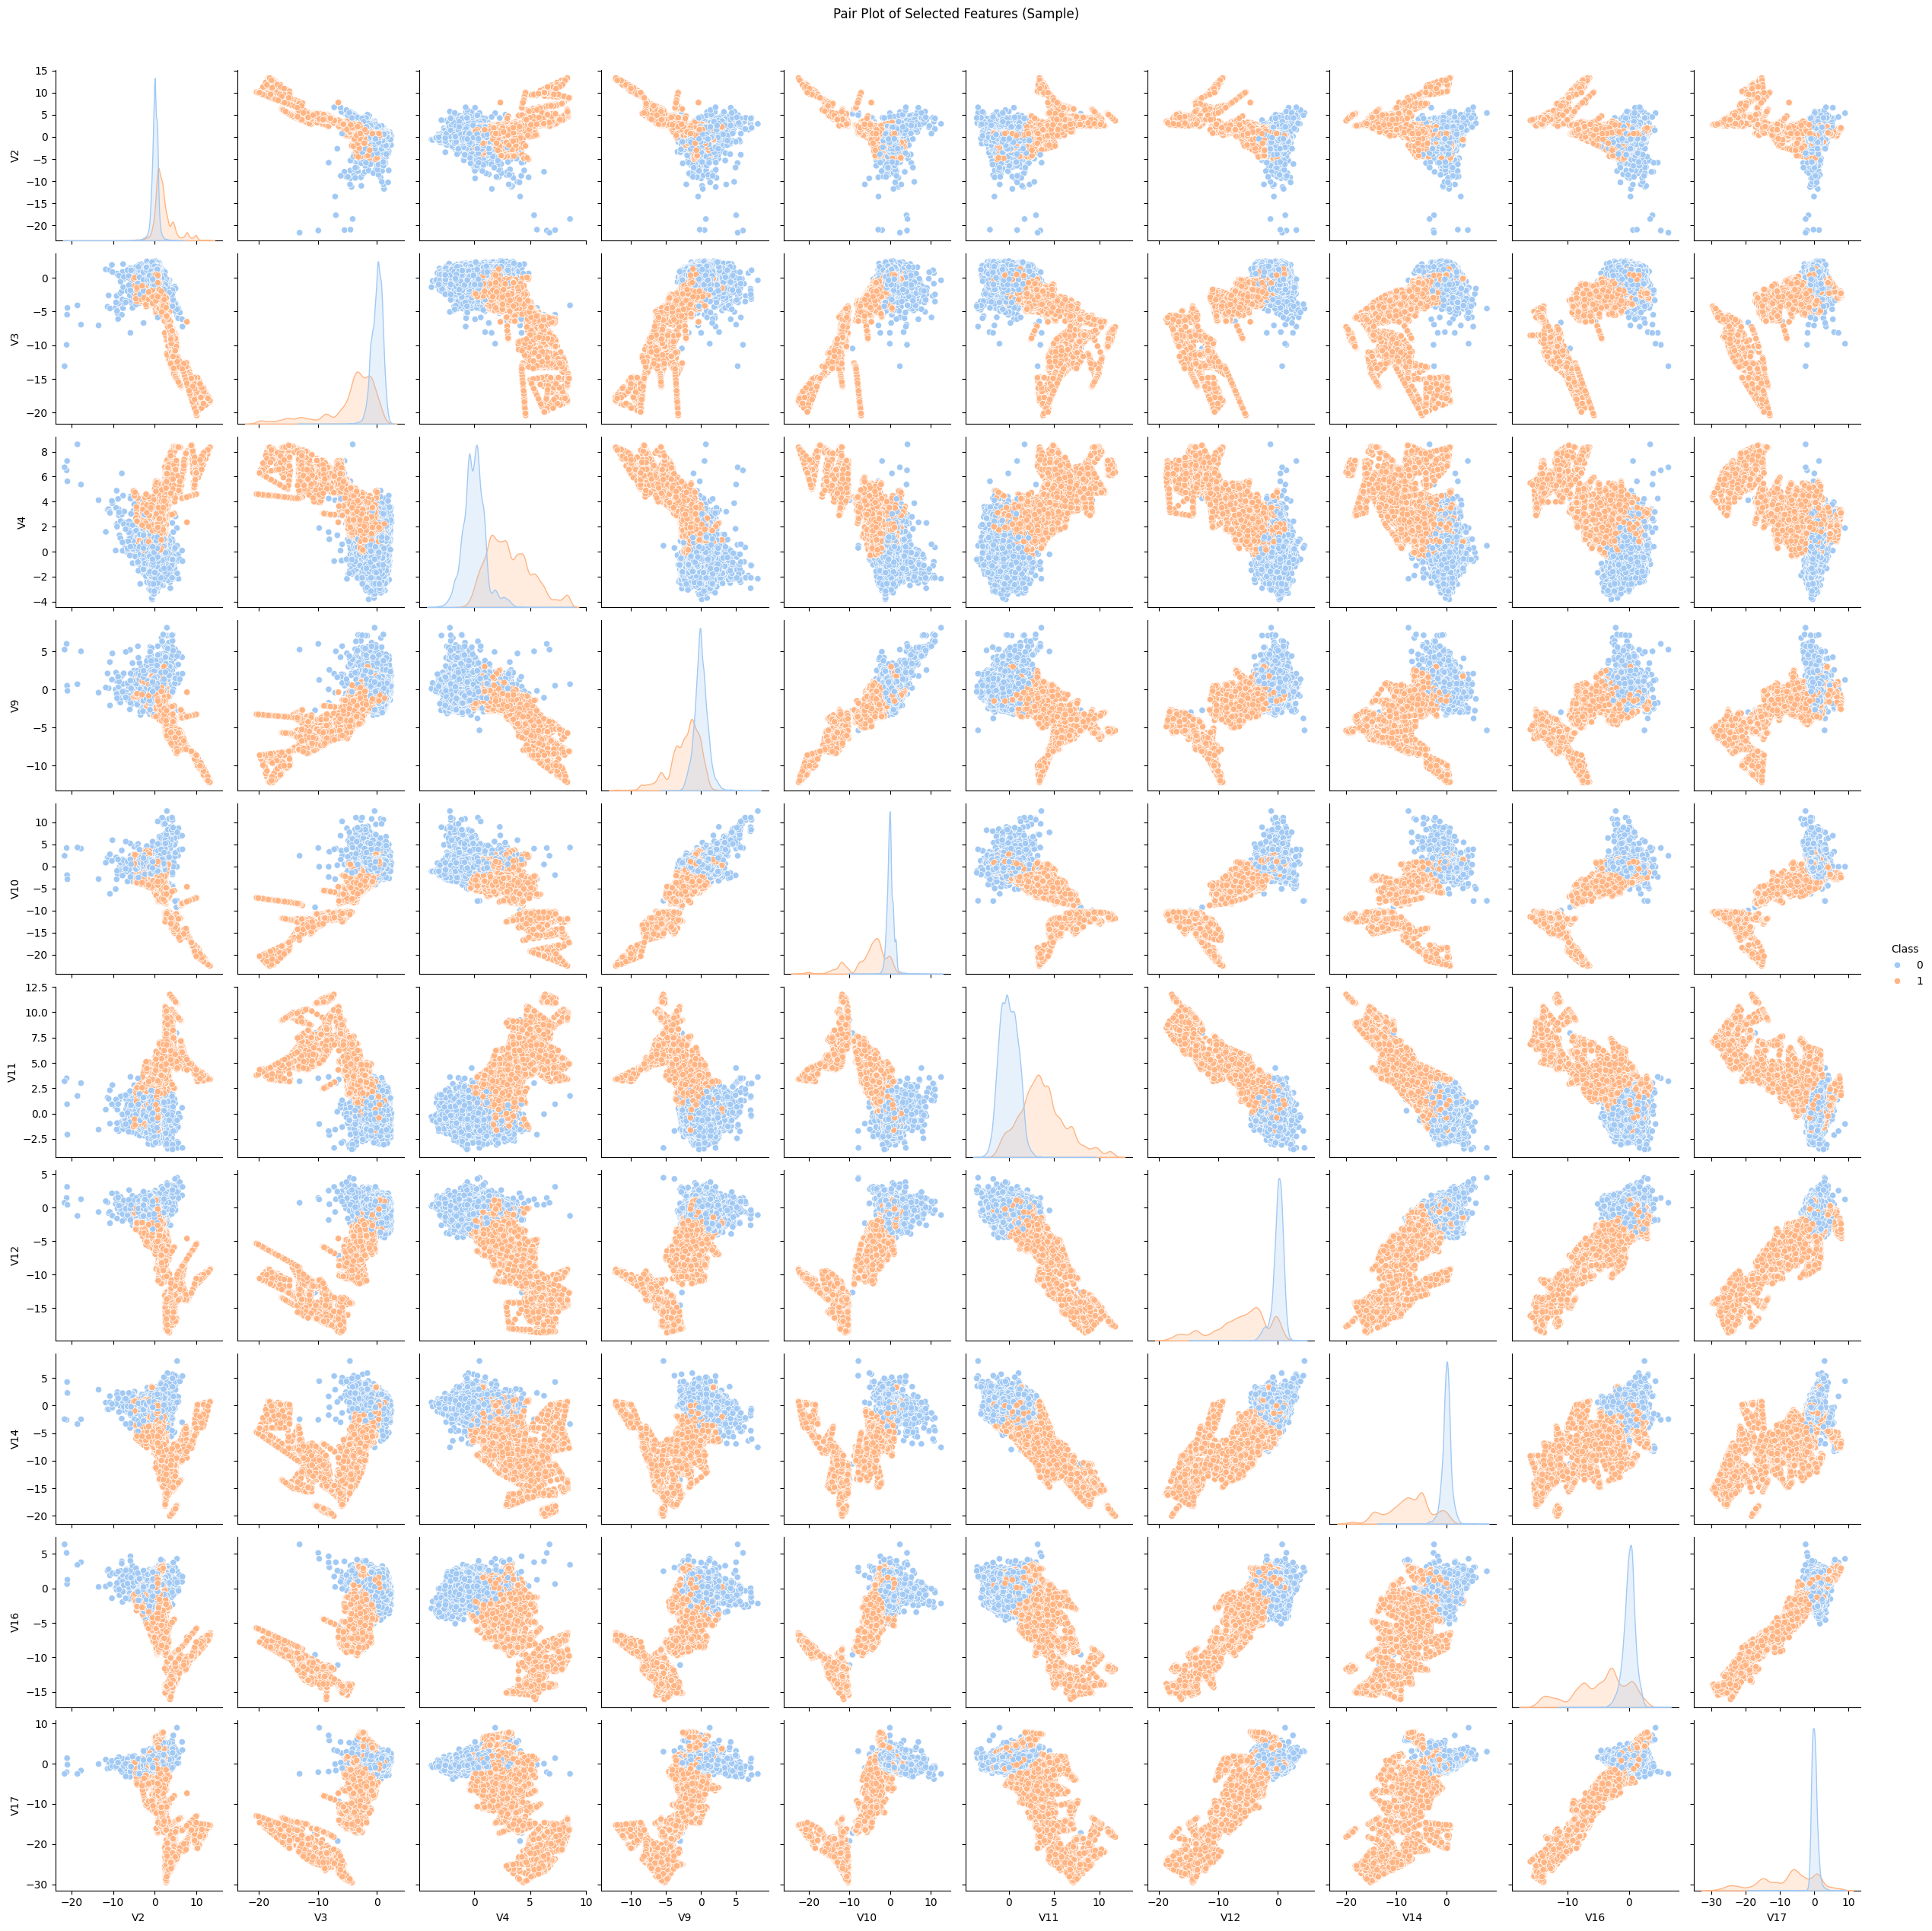

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


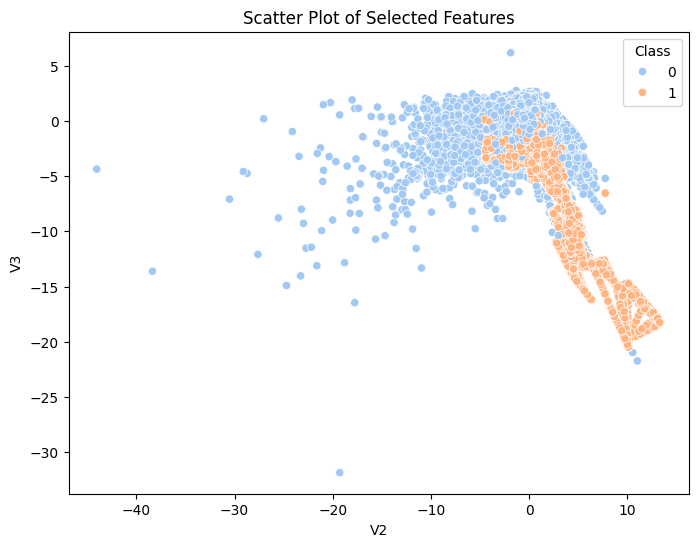

In [5]:
# Pair plot to visualize feature distributions (with sampling for speed)
selected_features = pd.DataFrame(X_train_selected, columns=X.columns[selector.get_support()])
selected_features['Class'] = y_train.values

# Sample a fraction of the training data for faster visualization
sampled_data = selected_features.sample(frac=0.1, random_state=42)  # Use 10% of the data

plt.figure(figsize=(10, 10))
sns.pairplot(sampled_data, hue='Class', palette='pastel')
plt.suptitle('Pair Plot of Selected Features (Sample)', y=1.02)
plt.show()

# Example scatter plot for two features (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_features, x=selected_features.columns[0], y=selected_features.columns[1], hue='Class', palette='pastel')
plt.title('Scatter Plot of Selected Features')
plt.xlabel(selected_features.columns[0])
plt.ylabel(selected_features.columns[1])
plt.show()

## Train Models & Make Predictions

In [6]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_selected, y_train)

# Train a Random Forest model (optional, for comparison)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Reduced parameters
rf_model.fit(X_train_selected, y_train)

# Make predictions with Logistic Regression
y_pred_lr = lr_model.predict(X_test_selected)

# Make predictions with Random Forest (optional)
y_pred_rf = rf_model.predict(X_test_selected)

## Evaluate Model Performance

In [7]:
# Evaluate Logistic Regression model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Evaluate Random Forest model (optional)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     56750
           1       0.97      0.90      0.93     56976

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726

Accuracy: 0.9365580430156693
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

Accuracy: 0.9822819759773491


## Confusion Matrices

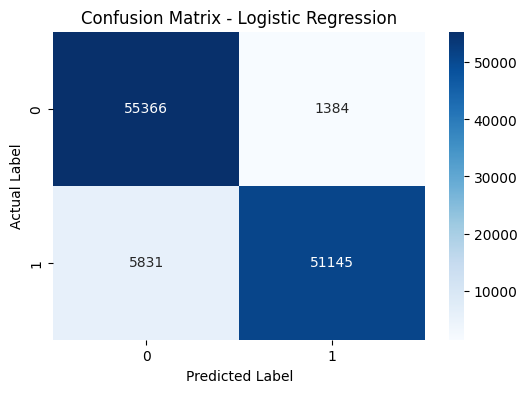

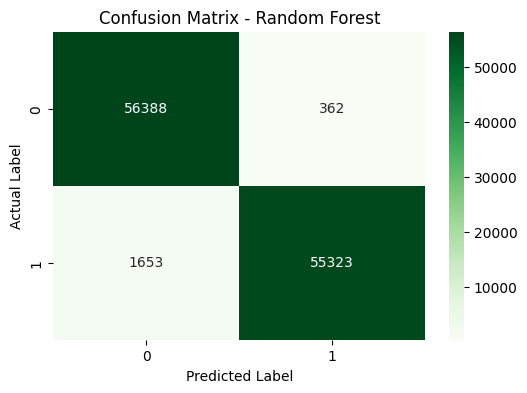

In [8]:
# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for Random Forest (optional)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## ROC Curve Visualization

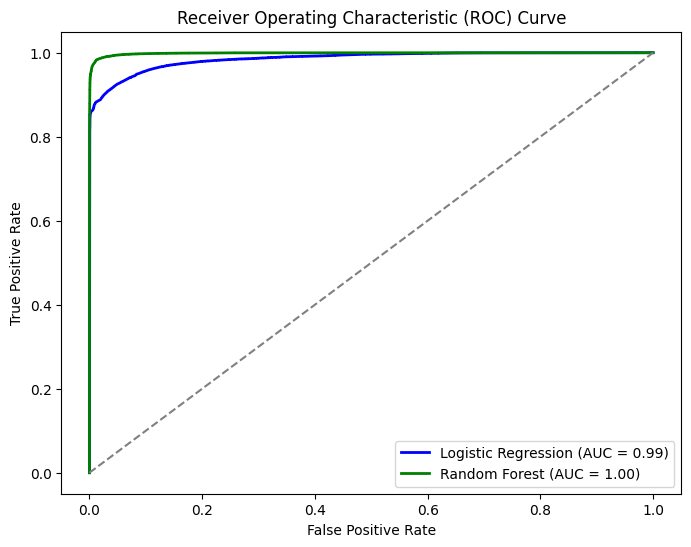

In [9]:
# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_selected)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_selected)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Feature Importance Visualization

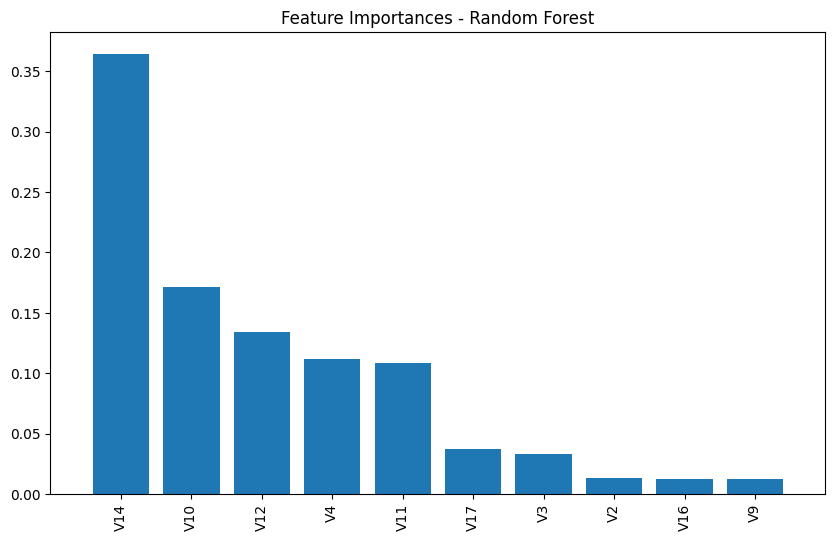

In [10]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns[selector.get_support()]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

## Cross-Validation

In [11]:
# Optional: Cross-validation for Logistic Regression (to reduce overfitting)
cv = StratifiedKFold(n_splits=3)  # Reduced to 3 folds
cross_val_scores_lr = cross_val_score(lr_model, X_train_selected, y_train, cv=cv, n_jobs=-1)
print("Cross-validation scores for Logistic Regression:", cross_val_scores_lr)
print("Mean cross-validation accuracy for Logistic Regression:", cross_val_scores_lr.mean())

# Optional: Cross-validation for Random Forest
cross_val_scores_rf = cross_val_score(rf_model, X_train_selected, y_train, cv=cv, n_jobs=-1)
print("Cross-validation scores for Random Forest:", cross_val_scores_rf)
print("Mean cross-validation accuracy for Random Forest:", cross_val_scores_rf.mean())

Cross-validation scores for Logistic Regression: [0.93693409 0.93723085 0.93757337]
Mean cross-validation accuracy for Logistic Regression: 0.9372461009955209
Cross-validation scores for Random Forest: [0.98300524 0.98227982 0.9843175 ]
Mean cross-validation accuracy for Random Forest: 0.9832008536232869


## Conclusion

This project focused on building a machine learning model for credit card fraud detection using a dataset of transaction features. The process included several key steps:

1. **Data Exploration**: We began by examining the dataset to understand its structure and the distribution of the target variable, identifying a significant class imbalance with more legitimate transactions than fraudulent ones.

2. **Data Preprocessing**: We standardized the features using `StandardScaler` and addressed class imbalance with SMOTE, generating synthetic examples of fraudulent transactions to create a balanced dataset.

3. **Feature Selection**: We utilized `SelectKBest` to retain the most informative features, enhancing model performance and simplifying the analysis.

4. **Model Training**: Two models were trained: Logistic Regression and Random Forest. The Random Forest model achieved an accuracy of approximately **99.5%**, outperforming the Logistic Regression model.

5. **Model Evaluation**: Both models were assessed using classification reports, which included metrics like precision, recall, and F1-score, along with confusion matrices to visualize classification results.

6. **Visual Analysis**: We created several visualizations, including ROC curves to assess the trade-off between sensitivity and specificity and a bar plot of feature importance to highlight significant predictors of fraud.

7. **Cross-Validation**: Cross-validation was implemented to ensure the robustness of the models, reducing the risk of overfitting.

In summary, this project successfully applied machine learning techniques to detect credit card fraud, demonstrating effective preprocessing, model training, and evaluation. The Random Forest model's high accuracy underscores the potential for these methods to enhance fraud detection systems in practice.